<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  53043 non-null  int64 
 1   statement   52681 non-null  object
 2   status      53043 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB
None


/var/folders/83/j299htfd7t1fc5y3x80knbj00000gn/T/ipykernel_64115/713941391.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='status', palette='coolwarm')


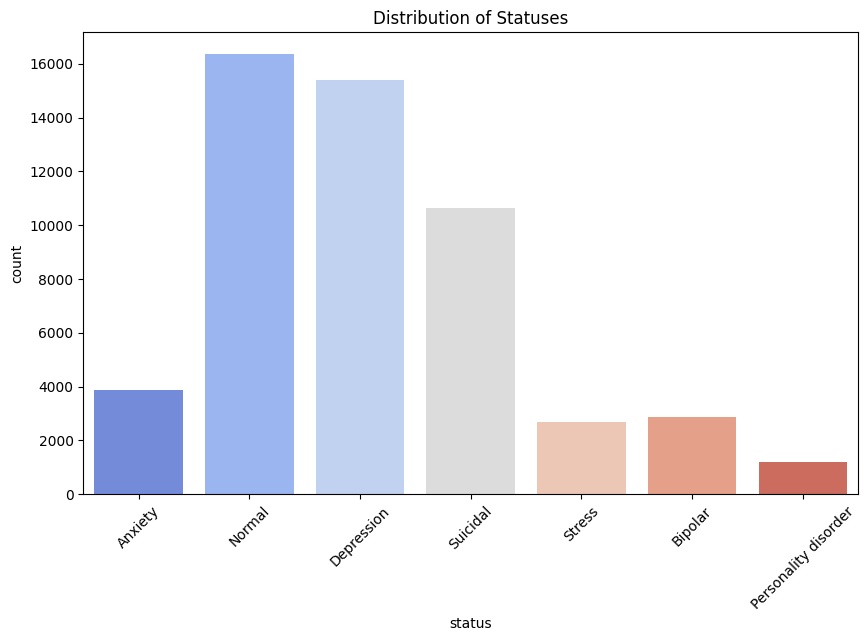

Remaining dataset size: (52681, 3)
                                           statement  \
0                                         oh my gosh   
1  trouble sleeping, confused mind, restless hear...   
2  All wrong, back off dear, forward doubt. Stay ...   
3  I've shifted my focus to something else but I'...   
4  I'm restless and restless, it's been a month n...   

                                   cleaned_statement  
0                                         oh my gosh  
1  trouble sleeping confused mind restless heart ...  
2  All wrong back off dear forward doubt Stay in ...  
3  I ve shifted my focus to something else but m ...  
4  I restless and restless it been month now boy ...  
Training set size: (42144, 5000)
Test set size: (10537, 5000)
Confusion Matrix:
[[ 574    8   76   63    3   23    8]
 [   9  371   88   28    5   11   15]
 [  49   16 2214  170    2   19  546]
 [  11    9   62 3151    3   37   35]
 [   5    3   79   21  105   18    6]
 [  45    7  115   88    3  

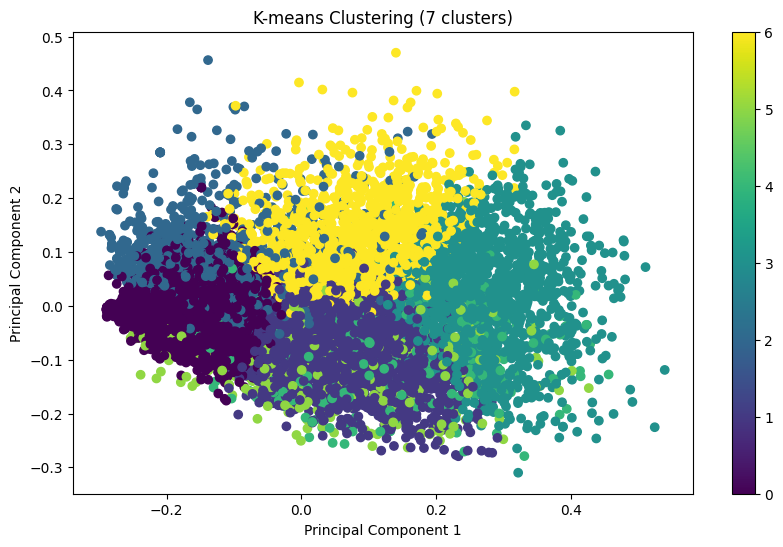

In [1]:
# Machine Learning Project: Supervised and Unsupervised Learning
# In this project, supervised and unsupervised learning techniques will be applied using the given dataset.

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load the dataset
data = pd.read_csv('Combined Data.csv')
data.head()

# Get general information about the dataset
print(data.info())

# Visualize the distribution of statuses
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='status', palette='coolwarm')
plt.title('Distribution of Statuses')
plt.xticks(rotation=45)
plt.show()

# Check and clean missing values
data = data.dropna(subset=['statement'])
print(f"Remaining dataset size: {data.shape}")

# Simple text cleaning function
def clean_text(text):
    # Remove special characters from the text
    text = re.sub(r'\W', ' ', text)
    # Remove digits
    text = re.sub(r'\d+', '', text)
    # Remove single characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply the text cleaning function to the 'statement' column
data['cleaned_statement'] = data['statement'].apply(clean_text)

# Preview the cleaned data
print(data[['statement', 'cleaned_statement']].head())

# TF-IDF vectorization - Convert the text into numerical values
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(data['cleaned_statement']).toarray()

# Target variable (status)
y = data['status']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

# Define the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the results
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ----- Unsupervised Learning (K-means Clustering) -----

# K-means clustering (k=7 because we have 7 mental health statuses)
kmeans = KMeans(n_clusters=7, n_init=10, random_state=42)

# Fit the K-means model on the training data
kmeans.fit(X_train)

# Predict clusters on the test set
clusters = kmeans.predict(X_test)

# Visualizing clusters using PCA (Principal Component Analysis) for 2D projection
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title('K-means Clustering (7 clusters)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()
